In [168]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import seaborn as sns
import matplotlib.pyplot as plt #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import tree
from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

In [149]:
df = pd.read_csv('data/weatherAUS.csv')
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [150]:
null_limit = 0.4
col_to_drop  = []
for elem in df.columns:
    if df[elem].isna().sum()/df.shape[0] >= null_limit:
        col_to_drop.append(elem)
        
df = df.drop(col_to_drop, axis=1)

In [151]:
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})

In [152]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month.astype(object)
df.drop('Date', inplace=True, axis=1)

In [153]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df_dummies = pd.get_dummies(df, columns=categoricals)
df_dummies.shape

(145460, 124)

In [154]:
df_dummies.dropna(inplace=True)
X = df_dummies.drop('RainTomorrow', axis = 1)
Y = df_dummies['RainTomorrow']  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 31)
Y_test.mean()

0.22770253002811142

In [160]:
def gbs(data, n):     
    inds = np.random.randint(0, len(data), (n, len(data))) #определяем индексы случайным образом
    numbers = data[inds] #выбираем значения по индексам
    return numbers
target = X_train['MinTemp'].values #выбираем целевую переменную
np.random.seed(31) #задаём параметр генератора случайных чисел
mean_values = [np.mean(x) for x in gbs(target, 1000)] #получаем все средние значения
np.std(mean_values) #находим для них стандартное отклонение

0.02879072820657669

In [161]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, Y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)
metrics.roc_auc_score(Y_test, preds_test)

c:\Users\Администратор.000\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7267267250538079

In [164]:
params = {
    'max_leaf_nodes': list(range(2, 10)), 
    'min_samples_split': [2, 3, 4], 
    'max_depth': [5,7,9,11]
}

grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, verbose=3, cv=3)
grid_search_cv.fit(X_train, Y_train)
print(grid_search_cv.best_params_)

clf = tree.DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 9, min_samples_split = 2, random_state=42)
clf.fit(X_train, Y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)
print(round(metrics.roc_auc_score(Y_test, preds_test), 2))

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=2;, score=0.817 total time=   0.1s
[CV 2/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=2;, score=0.820 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=2;, score=0.825 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=3;, score=0.817 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=3;, score=0.820 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=3;, score=0.825 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=4;, score=0.817 total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=4;, score=0.820 total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=2, min_samples_split=4;, score=0.825 total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=3, min_samples_split=2;,

In [165]:
clf = ensemble.RandomForestClassifier(n_estimators = 100, random_state=31)
clf.fit(X_train, Y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)
print(round(metrics.roc_auc_score(Y_test, preds_test), 2))

0.73


In [166]:
params = {
    'max_features': [4, 5, 6, 7], 
    'min_samples_leaf': [3, 5, 7, 9, 11], 
    'max_depth': [5, 10, 15]
}
grid_search_cv = GridSearchCV(ensemble.RandomForestClassifier(random_state=31), params, verbose=3, cv=3)
grid_search_cv.fit(X_train, Y_train)
print(grid_search_cv.best_params_)
clf = ensemble.RandomForestClassifier(max_depth=15, max_features=7, min_samples_leaf=3, random_state=31)
clf.fit(X_train, Y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)
print(round(metrics.roc_auc_score(Y_test, preds_test), 2))

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.776 total time=   1.1s
[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.775 total time=   1.0s
[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.775 total time=   1.0s
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.776 total time=   1.0s
[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.775 total time=   1.0s
[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.775 total time=   1.0s
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.776 total time=   1.0s
[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.775 total time=   1.0s
[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.775 total time=   1.0s
[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=9;, score=0.776 total time=   1.0

In [167]:
feature_names = [x for x in df_dummies if x != 'RainTomorrow']
best_tree = pd.DataFrame({'feat': feature_names,
              'coef': clf.feature_importances_}).sort_values(by='coef', ascending=False)

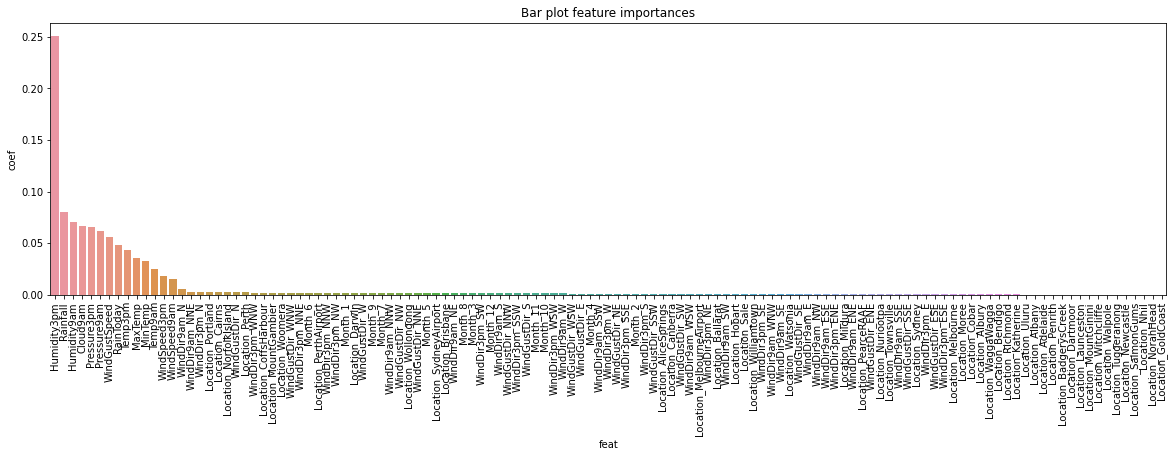

In [171]:
fig, ax = plt.subplots(figsize=(20, 5)) #фигура + координатная плоскость
# Строим столбчатую диаграмму
sns.barplot(data=best_tree, x='feat', y='coef', ax=ax);
# Добавляем подпись к графику и поворот меток на оси абсцисс
ax.set_title('Bar plot feature importances')
ax.xaxis.set_tick_params(rotation=90)